In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('ecommerce_customer_behavior_dataset.csv')
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [35]:
g1=df.groupby('Product_Category').agg({
    'Discount_Amount':'sum'
}
    )

In [37]:
g1

,Discount_Amount
Product_Category,
Beauty,3761.18
Books,1989.26
Electronics,62196.18
Fashion,8540.20
Food,2212.46
Home & Garden,22019.83
Sports,18277.06
Toys,5267.85


In [17]:
grouped=df.groupby('City').agg({
    'Total_Amount':'sum',
    
})

In [18]:
grouped

,Total_Amount
City,
Adana,427059.63
Ankara,657535.82
Antalya,315549.89
Bursa,459076.31
Eskisehir,178978.43
Gaziantep,318408.41
Istanbul,1334122.56
Izmir,567534.67
Kayseri,312303.91


In [43]:
pivot = df.pivot_table(
    values='Discount_Amount',
    index='City',
    columns='Product_Category',
    aggfunc='sum',
    fill_value=0
)
pivot

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
City,,,,,,,,
Adana,275.81,149.34,6069.11,551.85,152.26,1770.25,1694.08,324.28
Ankara,467.27,245.72,8183.50,942.44,438.96,2858.70,2908.42,704.93
Antalya,503.60,160.02,3357.69,638.06,199.18,2717.50,1350.95,342.90
Bursa,533.13,157.21,5395.32,754.57,244.77,2925.50,1676.31,328.67
Eskisehir,116.64,143.27,2820.12,663.25,108.17,933.14,517.22,111.34
Gaziantep,176.01,217.13,3447.48,844.26,150.51,1542.41,1171.17,543.02
Istanbul,1165.36,529.25,15428.23,1876.73,451.65,5194.48,4209.10,1306.62
Izmir,306.00,146.69,6134.45,1217.84,245.40,1836.08,1983.27,795.05
Kayseri,79.19,92.18,7689.03,328.51,91.80,1084.80,1415.11,349.16


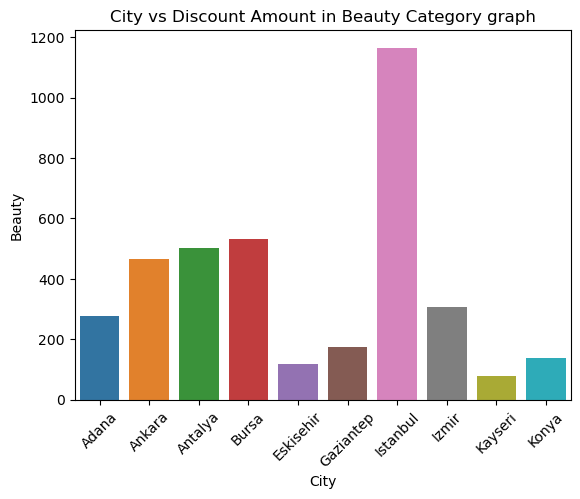

In [71]:
sns.barplot(x='City',y='Beauty',data=pivot,hue='City')
plt.xticks(rotation=45)
plt.title('City vs Discount Amount in Beauty Category graph')
plt.show()
        


In [49]:
p1=df.pivot_table(
    values='Total_Amount',
    index='City',
    columns='Product_Category',
    aggfunc='sum',
    fill_value=0
)
p1

Product_Category,Beauty,Books,Electronics,Fashion,Food,Home & Garden,Sports,Toys
City,,,,,,,,
Adana,13332.53,6693.41,234434.40,24053.83,3441.71,55252.36,72894.54,16956.85
Ankara,20055.91,10349.69,306703.00,50752.68,15766.04,108307.93,112636.74,32963.83
Antalya,11059.05,5544.10,150048.13,16681.66,7895.06,70243.13,38834.39,15244.37
Bursa,18777.17,7525.35,187055.25,41849.47,10253.76,99528.52,68113.80,25972.99
Eskisehir,7353.97,4273.24,69321.33,14637.99,5920.44,44231.40,25060.04,8180.02
Gaziantep,7751.87,5170.14,160398.60,31406.09,7035.34,45942.40,46450.45,14253.52
Istanbul,43040.41,20790.86,619907.93,106812.42,23280.16,261927.24,202157.75,56205.79
Izmir,19089.17,5750.74,252927.12,49398.05,11621.88,113476.16,88536.79,26734.76
Kayseri,9065.04,2342.01,194896.35,14248.84,4127.64,37703.77,38214.55,11705.71


In [5]:
df.isnull().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [7]:
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


In [9]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card         2012
Debit Card          1265
Digital Wallet       965
Bank Transfer        510
Cash on Delivery     248
Name: count, dtype: int64

In [73]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [75]:
numeric_df = df.select_dtypes(include=['number'])

In [77]:
numeric_df

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
0,27,54.28,1,0.00,54.28,4,14,8,5
1,42,244.90,1,0.00,244.90,11,3,3,3
2,43,48.15,5,0.00,240.75,7,8,5,2
3,32,804.06,1,229.28,574.78,8,10,1,4
4,40,755.61,5,0.00,3778.05,21,10,7,4
...,...,...,...,...,...,...,...,...,...
4995,18,130.35,1,27.30,103.05,17,10,9,1
4996,27,71.55,1,0.00,71.55,13,9,6,4
4997,45,39.38,1,5.27,34.11,38,10,5,4
4998,41,171.19,1,0.00,171.19,20,12,5,4


,Session_Duration_Minutes,Pages_Viewed,Customer_Rating
Age,,,
18,6700,4114,3.944812
19,833,582,4.063492
20,1145,748,4.088608
21,1373,759,3.732558
22,1312,839,4.094737
23,1780,1101,3.801724
24,1411,943,4.047170
25,1855,1156,3.937008
26,1650,1095,3.726496


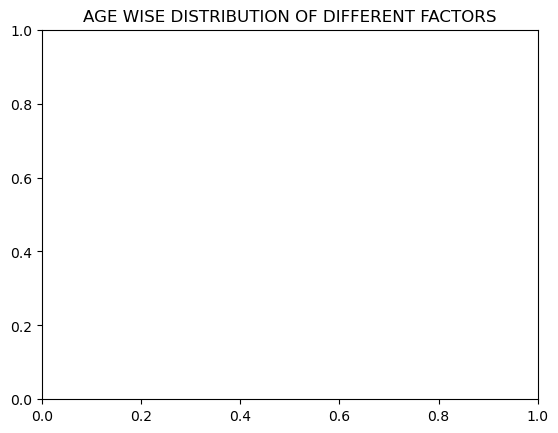

In [91]:
plt.title('AGE WISE DISTRIBUTION OF DIFFERENT FACTORS')

df.groupby('Age').agg({
    'Session_Duration_Minutes':'sum',
    'Pages_Viewed':'sum',
    'Customer_Rating':'mean'
}
)

In [81]:
(df['Age']<35 ).value_counts()

Age
False    2526
True     2474
Name: count, dtype: int64

In [83]:
(df['Age']>35).value_counts()

Age
False    2639
True     2361
Name: count, dtype: int64